In [3]:
import numpy as np
from scipy.signal import find_peaks
from scipy.interpolate import interp1d
import matplotlib.pylab as plt
from tqdm import tqdm
from Code.Tutorial.Dataset import load_scg

plt.rcParams['figure.figsize'] = (10,8)
plt.rcParams['font.size'] = 14
plt.rcParams['image.cmap'] = 'plasma'
plt.rcParams['axes.linewidth'] = 2

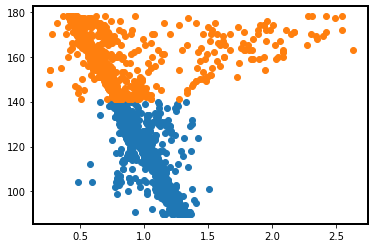

((4718,), (2817,))

In [10]:
signals_train, labels_train, duration, fs = load_scg(0.8, 'train')
signals_test, labels_test, _, _ = load_scg(0.8, 'test')
# signals_clean, _, _, _ = load_scg(0, 'train')
S_train, D_train = labels_train[:, -2], labels_train[:, -1]
S_test, D_test = labels_test[:, -2], labels_test[:, -1]


features_train_auto = np.load('../../Data/SSA/features_train_0.8_5000_NoRR_auto.npy')
features_test_auto = np.load('../../Data/SSA/features_test_0.8_3000_NoRR_auto.npy')


idx_train = np.load('../../Data/SSA/idx_train_0.8_5000_NoRR_auto.npy')
idx_test = np.load('../../Data/SSA/idx_test_0.8_3000_NoRR_auto.npy')

plt.scatter(features_train_auto[:, 3].reshape(-1, 1), S_train[idx_train])
plt.scatter(features_test_auto[:, 3].reshape(-1, 1), S_test[idx_test])
plt.show()


idx_train.shape, idx_test.shape

((4718,), (2812,))

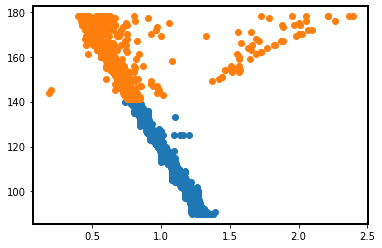

In [11]:
features_train_np = np.load('../../Data/SSA/features_train_0.8_5000.npz.npy')
features_test_np = np.load('../../Data/SSA/features_test_0.8_3000.npz.npy')

idx_train = np.load('../../Data/SSA/idx_train_0.8_5000.npz.npy')
idx_test = np.load('../../Data/SSA/idx_test_0.8_3000.npz.npy')

plt.scatter(features_train_np[:, 3].reshape(-1, 1), S_train[idx_train])
plt.scatter(features_test_np[:, 3].reshape(-1, 1), S_test[idx_test])
idx_train.shape, idx_test.shape

聚类过程： [[5.20000000e+01 5.30000000e+01 4.71857279e-03 2.00000000e+00]
 [5.00000000e+01 5.10000000e+01 4.82937340e-03 2.00000000e+00]
 [3.50000000e+01 3.60000000e+01 5.03728716e-03 2.00000000e+00]
 [3.80000000e+01 3.90000000e+01 5.43825923e-03 2.00000000e+00]
 [4.50000000e+01 4.60000000e+01 5.52804401e-03 2.00000000e+00]
 [9.40000000e+01 9.50000000e+01 5.82924268e-03 2.00000000e+00]
 [4.30000000e+01 4.40000000e+01 6.11968114e-03 2.00000000e+00]
 [4.80000000e+01 4.90000000e+01 6.40994326e-03 2.00000000e+00]
 [2.70000000e+01 2.80000000e+01 9.53487715e-03 2.00000000e+00]
 [4.00000000e+01 4.10000000e+01 1.02840984e-02 2.00000000e+00]
 [5.60000000e+01 5.70000000e+01 1.40024259e-02 2.00000000e+00]
 [3.20000000e+01 3.30000000e+01 2.55827001e-02 2.00000000e+00]
 [1.30000000e+01 1.40000000e+01 2.74606617e-02 2.00000000e+00]
 [5.40000000e+01 5.50000000e+01 3.11263445e-02 2.00000000e+00]
 [1.10000000e+01 1.20000000e+01 3.88207864e-02 2.00000000e+00]
 [9.20000000e+01 9.30000000e+01 4.60209186e-02 2.

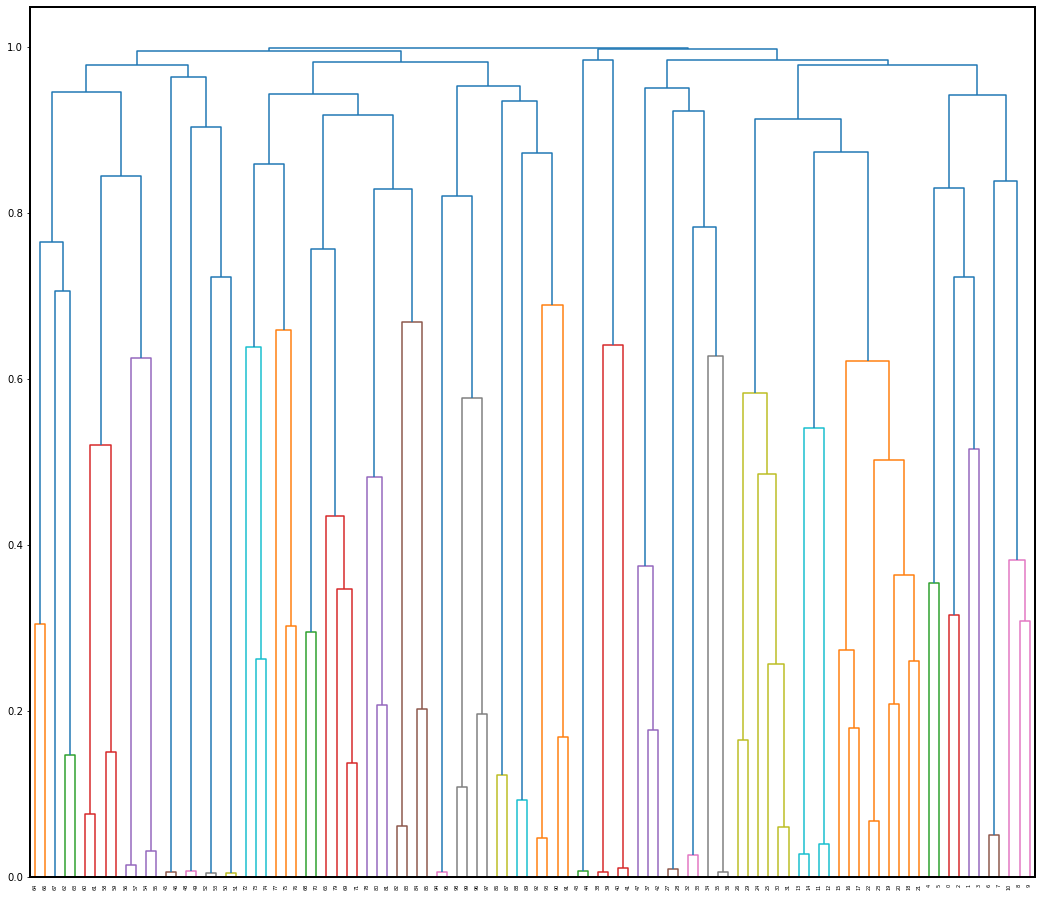

In [28]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from Code.Tutorial.algo_ssa import SSA

def X_to_TS(X_i):
    """Averages the anti-diagonals of the given elementary matrix, X_i, and returns a time series."""
    # Reverse the column ordering of X_i
    X_rev = X_i[::-1]
    # Full credit to Mark Tolonen at https://stackoverflow.com/a/6313414 for this one:
    return np.array([X_rev.diagonal(i).mean() for i in range(-X_i.shape[0]+1, X_i.shape[1])])

signal = signals_test[15]
L = 100
ssa_ = SSA(signal, L, False)
X_elem = ssa_.X_elem
TS = np.array([X_to_TS(X_elem[i]) for i in range(len(X_elem))])

data = TS


# 1. 层次聚类
# linkage方法用于计算两个聚类簇s和t之间的距离d(s,t)
# 层次聚类编码为一个linkage矩阵。
Z = linkage(data, 'average', 'correlation')
print("聚类过程：", Z)

# 从给定链接矩阵定义的层次聚类中形成平面聚类。
# distance：以距离为划分距离的准则
f = fcluster(Z, 6 ,'distance')
print("平面聚类结果：", f)

fig = plt.figure(figsize=(18, 16))
# 将层级聚类结果以树状图表示出来
dn = dendrogram(Z)
plt.show()
#


In [2]:
[10, 11, 12, 12, 10, 12, 11, 11, 12, 10, 10, 10, 10, 10, 10, 12, 10, 11, 12, 10, 12, 10, 11, 11, 10, 12, 11, 10, 12, 11, 11]


[10, 10, 10, 9, 9, 10, 6, 10, 11, 11, 10, 10, 9, 9, 10, 11, 11, 11, 11, 10, 10, 12, 11, 11, 10, 10, 9, 10, 11, 10, 11]

[10,
 10,
 10,
 9,
 9,
 10,
 6,
 10,
 11,
 11,
 10,
 10,
 9,
 9,
 10,
 11,
 11,
 11,
 11,
 10,
 10,
 12,
 11,
 11,
 10,
 10,
 9,
 10,
 11,
 10,
 11]